
**P5.** Using CAMB, compute the matter power spectrum at different redshift. Then, manually set the density of massive neutrinos to zero. Comment on the differences and justify the results.


In [1]:
import camb
from camb import model, initialpower
import numpy as np
import matplotlib.pyplot as plt

H0 = 67.4  
omega_m = 0.315  
omega_ch2 = 0.120  
omega_bh2 = 0.0224  
ns = 0.965  
tau = 0.054  

pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)
pars.InitPower.set_params(As=2e-9, ns=ns, r=0)  
pars.set_for_lmax(2500, lens_potential_accuracy=0)
pars.set_matter_power(redshifts=[0, 0.5, 1, 2], kmax=2.0)

results = camb.get_results(pars)

Note: redshifts have been re-sorted (earliest first)


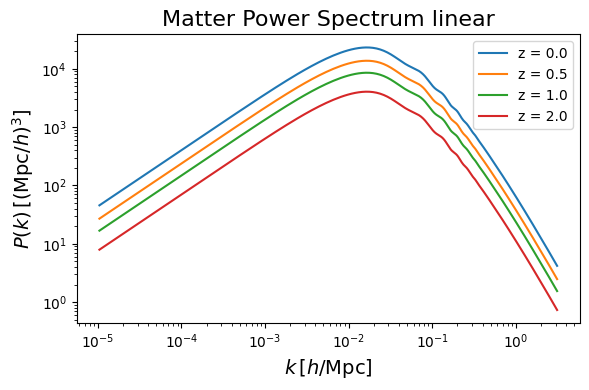

In [2]:
kh, z, PK = results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True)

plt.figure(figsize=(6, 4))

for i, redshift in enumerate(z):
    plt.loglog(kh, PK[i], label=f'z = {redshift}')

plt.xlabel(r'$k \, [h/\mathrm{Mpc}]$', fontsize=14)
plt.ylabel(r'$P(k) \, [(\mathrm{Mpc}/h)^3]$', fontsize=14)
plt.title('Matter Power Spectrum linear', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

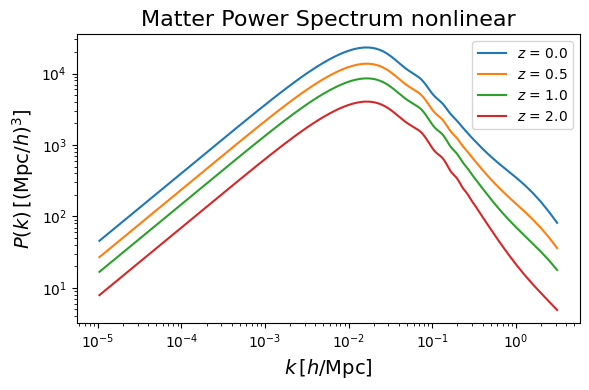

In [3]:
kh, z, PK = results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit=True, nonlinear=True)

plt.figure(figsize=(6, 4))
for i, redshift in enumerate(z):
    plt.loglog(kh, PK[i], label=f'$z$ = {redshift}')

plt.xlabel(r'$k \, [h/\mathrm{Mpc}]$', fontsize=14)
plt.ylabel(r'$P(k) \, [(\mathrm{Mpc}/h)^3]$', fontsize=14)
plt.title('Matter Power Spectrum nonlinear', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

k_NL(z=0.0) = 0.22003129124641418
k_NL(z=0.5) = 0.3169160485267639
k_NL(z=1.0) = 0.4676256477832795
k_NL(z=2.0) = 1.0200239419937134


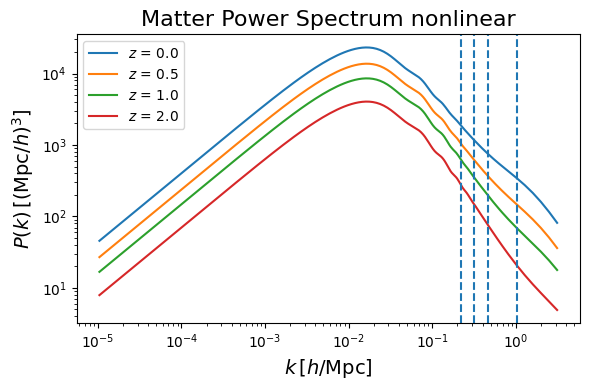

In [4]:
# Función para calcular Delta^2_L(k, a) para cada k
def delta_squared(k, Pk):
    return (k**3 * Pk) / (2 * np.pi**2)

# Encontrar k_NL tal que Delta^2(k_NL, a) = 1 para cada redshift
k_NL = []
for i, redshift in enumerate(z):
    a = 1 / (1 + redshift)  
    delta_L2 = delta_squared(kh, PK[i])  
    
    k_nl_value = kh[np.abs(delta_L2 - 1).argmin()]  
    k_NL.append(k_nl_value)

    print(f"k_NL(z={redshift}) = {k_nl_value}")

plt.figure(figsize=(6, 4))
for i, redshift in enumerate(z):
    plt.loglog(kh, PK[i], label=f'$z$ = {redshift}')

for i, k_val in enumerate(k_NL):
    plt.axvline(x=k_val, linestyle="--")

plt.xlabel(r'$k \, [h/\mathrm{Mpc}]$', fontsize=14)
plt.ylabel(r'$P(k) \, [(\mathrm{Mpc}/h)^3]$', fontsize=14)
plt.title('Matter Power Spectrum nonlinear', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

**P6.** Using CAMB compute the TT angular power spectrum. Then, explore different cosmological parameters and explain the differences in the results. Give at least one compelling example and its justification.



In [5]:
powers = results.get_cmb_power_spectra(pars, CMB_unit="muK")
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


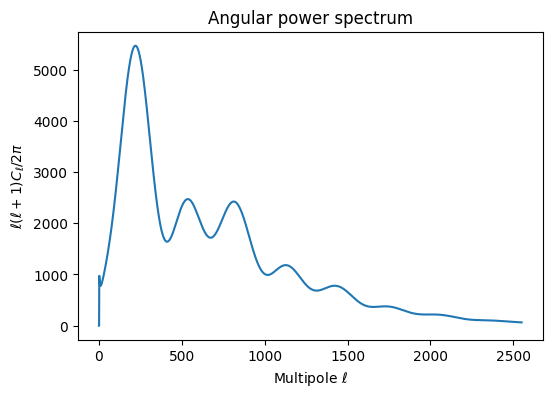

In [6]:
ell = np.arange(powers['total'].shape[0]) 
cl_TT = powers['total'][:, 0]  

plt.figure(figsize=(6,4))
plt.plot(ell, cl_TT, label='TT')
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell / 2\pi$')
plt.title('Angular power spectrum')
plt.show()

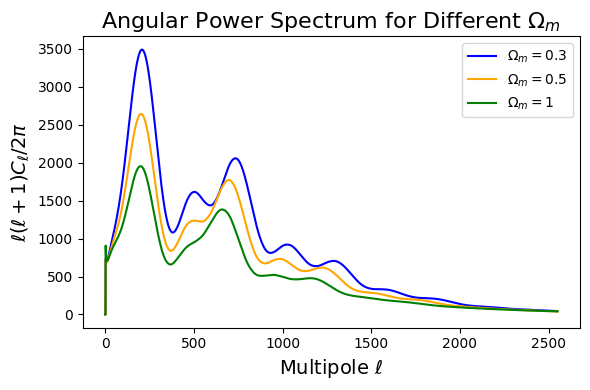

In [7]:
omega_m_variation = [0.3, 0.5, 1]  
colors = ['blue', 'orange', 'green']
plt.figure(figsize=(6, 4))

for omega_m_new in omega_m_variation:
    omch2_new = omega_m_new - omega_bh2  
    pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omch2_new, tau=tau)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit="muK")
    cl_TT = powers['total'][:, 0]
    plt.plot(ell, cl_TT, label=f'$\Omega_m = {omega_m_new}$', color=colors.pop(0))

plt.xlabel(r'Multipole $\ell$', fontsize=14)
plt.ylabel(r'$\ell(\ell+1)C_\ell / 2\pi$', fontsize=14)
plt.title('Angular Power Spectrum for Different $\Omega_m$', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
print("commit test")

commit test
